# Predicting Red Wine Quality Using Machine Learning

Student: 

## Import required libraries

In [80]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report, ConfusionMatrixDisplay

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

https://www.kaggle.com/datasets/uciml/red-wine-quality-cortez-et-al-2009

## Load the dataset

In [81]:
wine_data = pd.read_csv('winequality-red.csv')

## Data Exploration

In [82]:
# Display the first rows of the dataset
wine_data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [83]:
wine_data.shape

(1599, 12)

In [84]:
wine_data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [85]:
wine_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [86]:
# Show the total of the missing values
wine_data.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

### Distribution of wine quality scores

In [87]:
wine_data.value_counts('quality')

quality
5    681
6    638
7    199
4     53
8     18
3     10
Name: count, dtype: int64

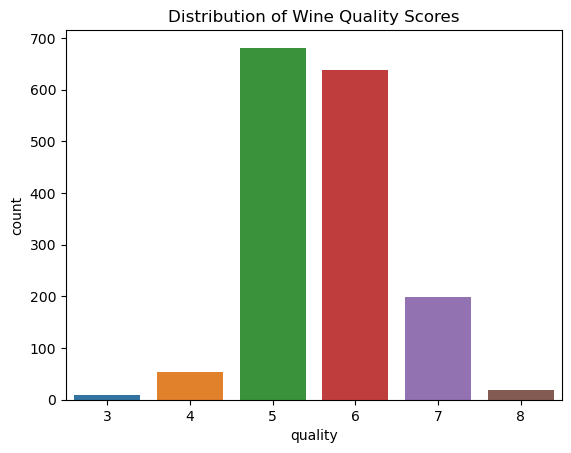

In [88]:
sns.countplot(x='quality', data=wine_data)
plt.title('Distribution of Wine Quality Scores')
plt.show()

### Visualize the Distribution of Each Feature

/Users/alpertoo/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/alpertoo/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/alpertoo/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/alpertoo/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future ver

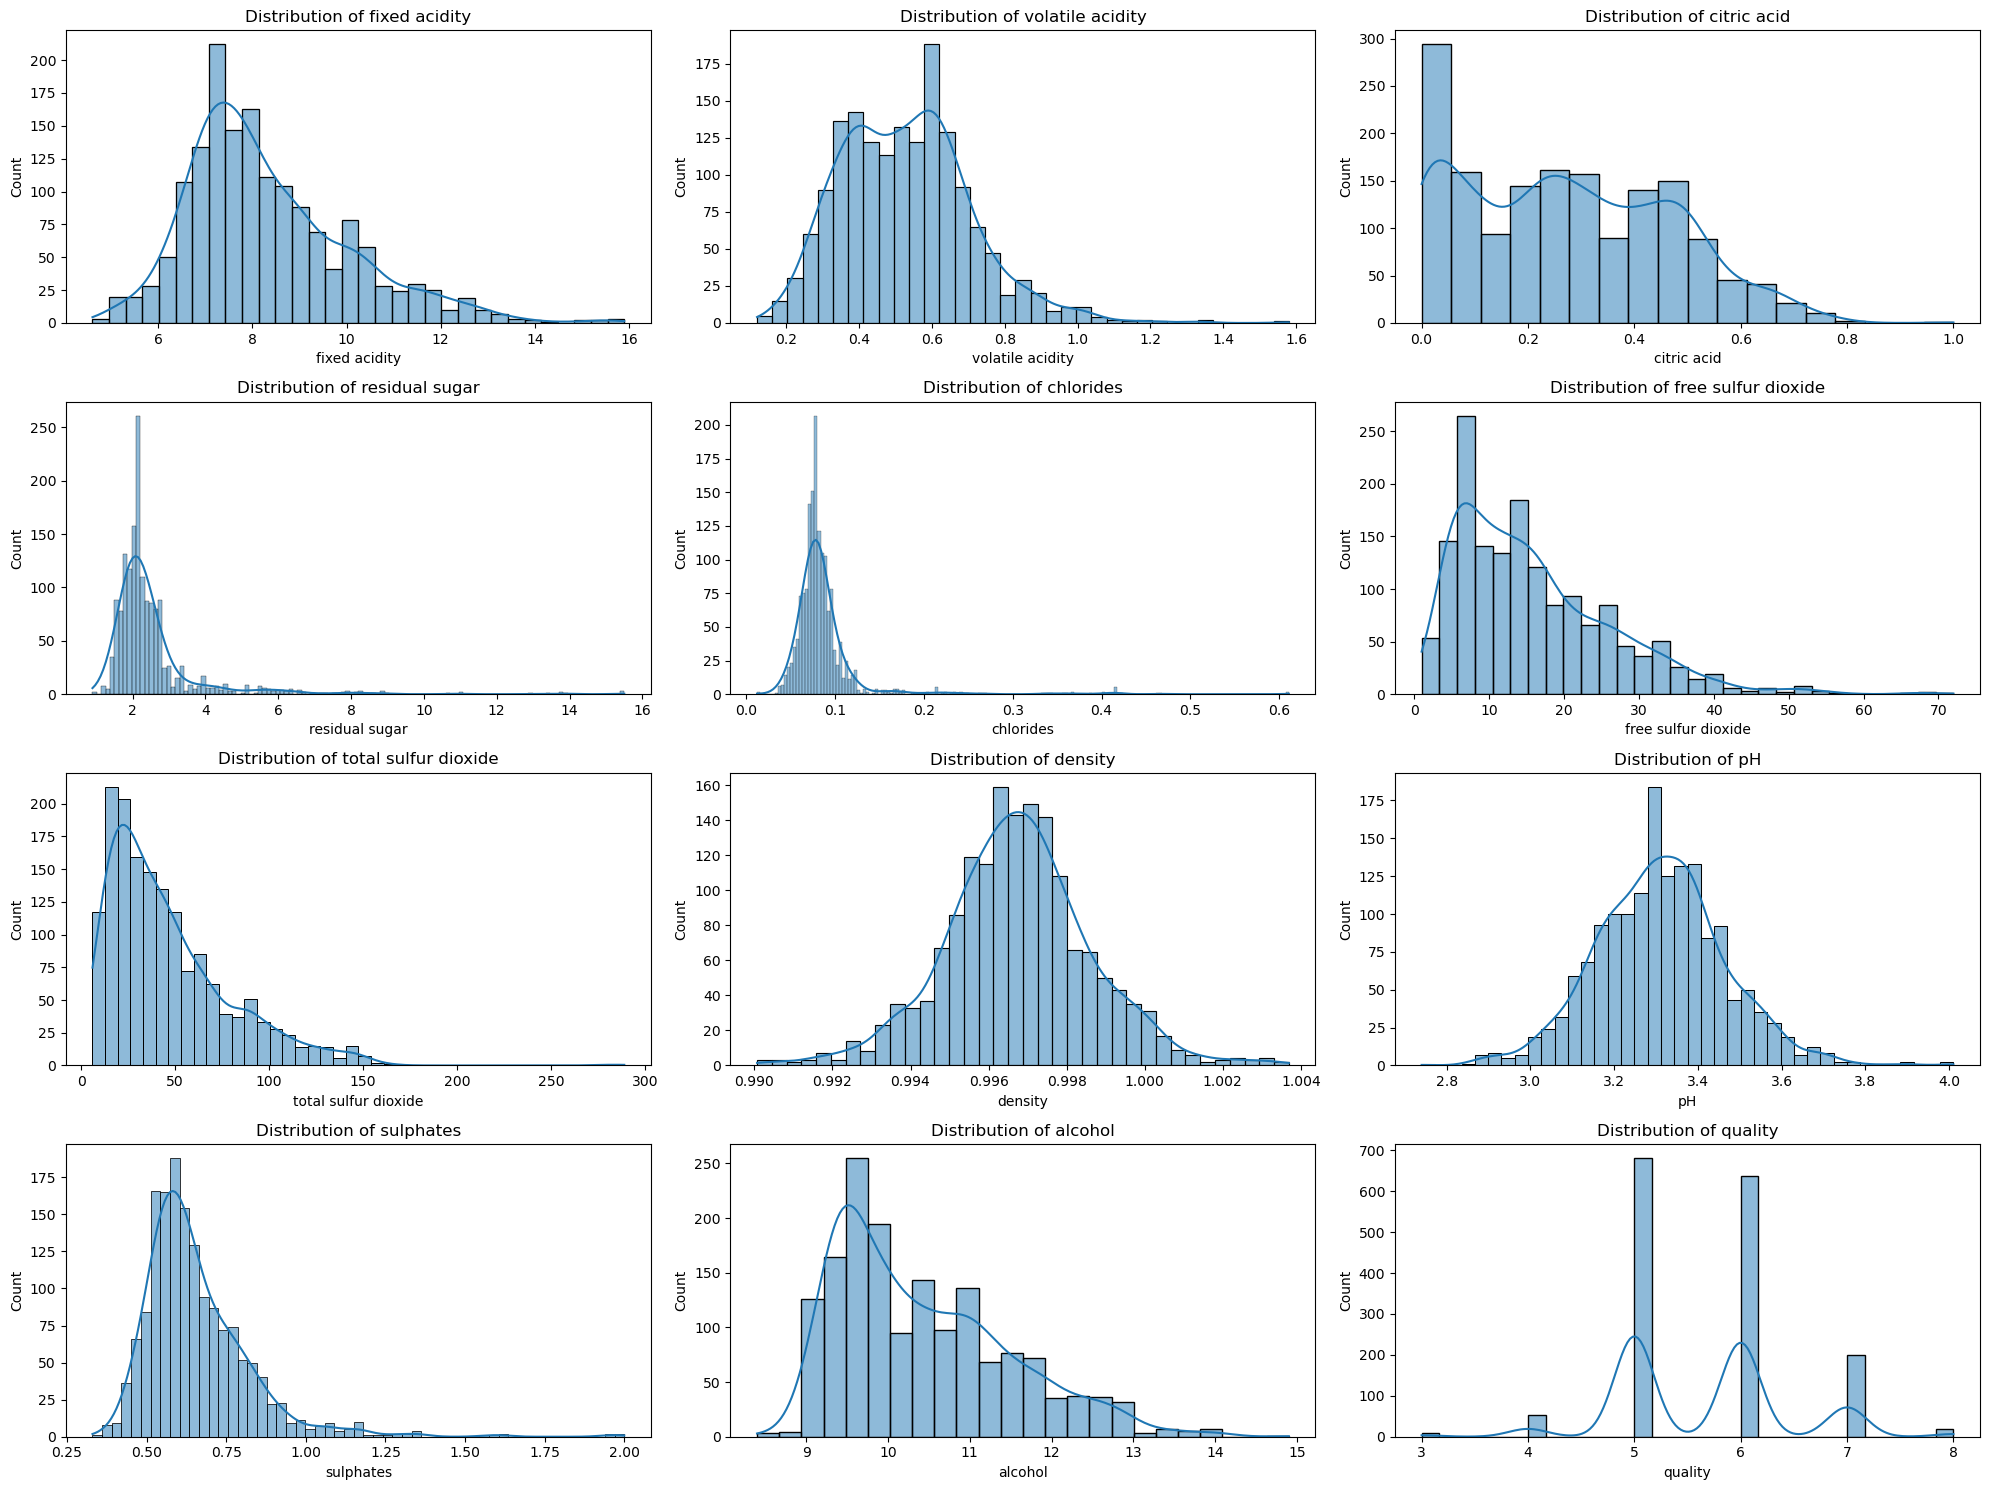

In [89]:
plt.figure(figsize=(20, 15))
for i, column in enumerate(wine_data.columns, 1):
    plt.subplot(4, 3, i)
    sns.histplot(wine_data[column], kde=True)
    plt.title(f'Distribution of {column}')
plt.tight_layout()
plt.show()

### Identify and handle outliers

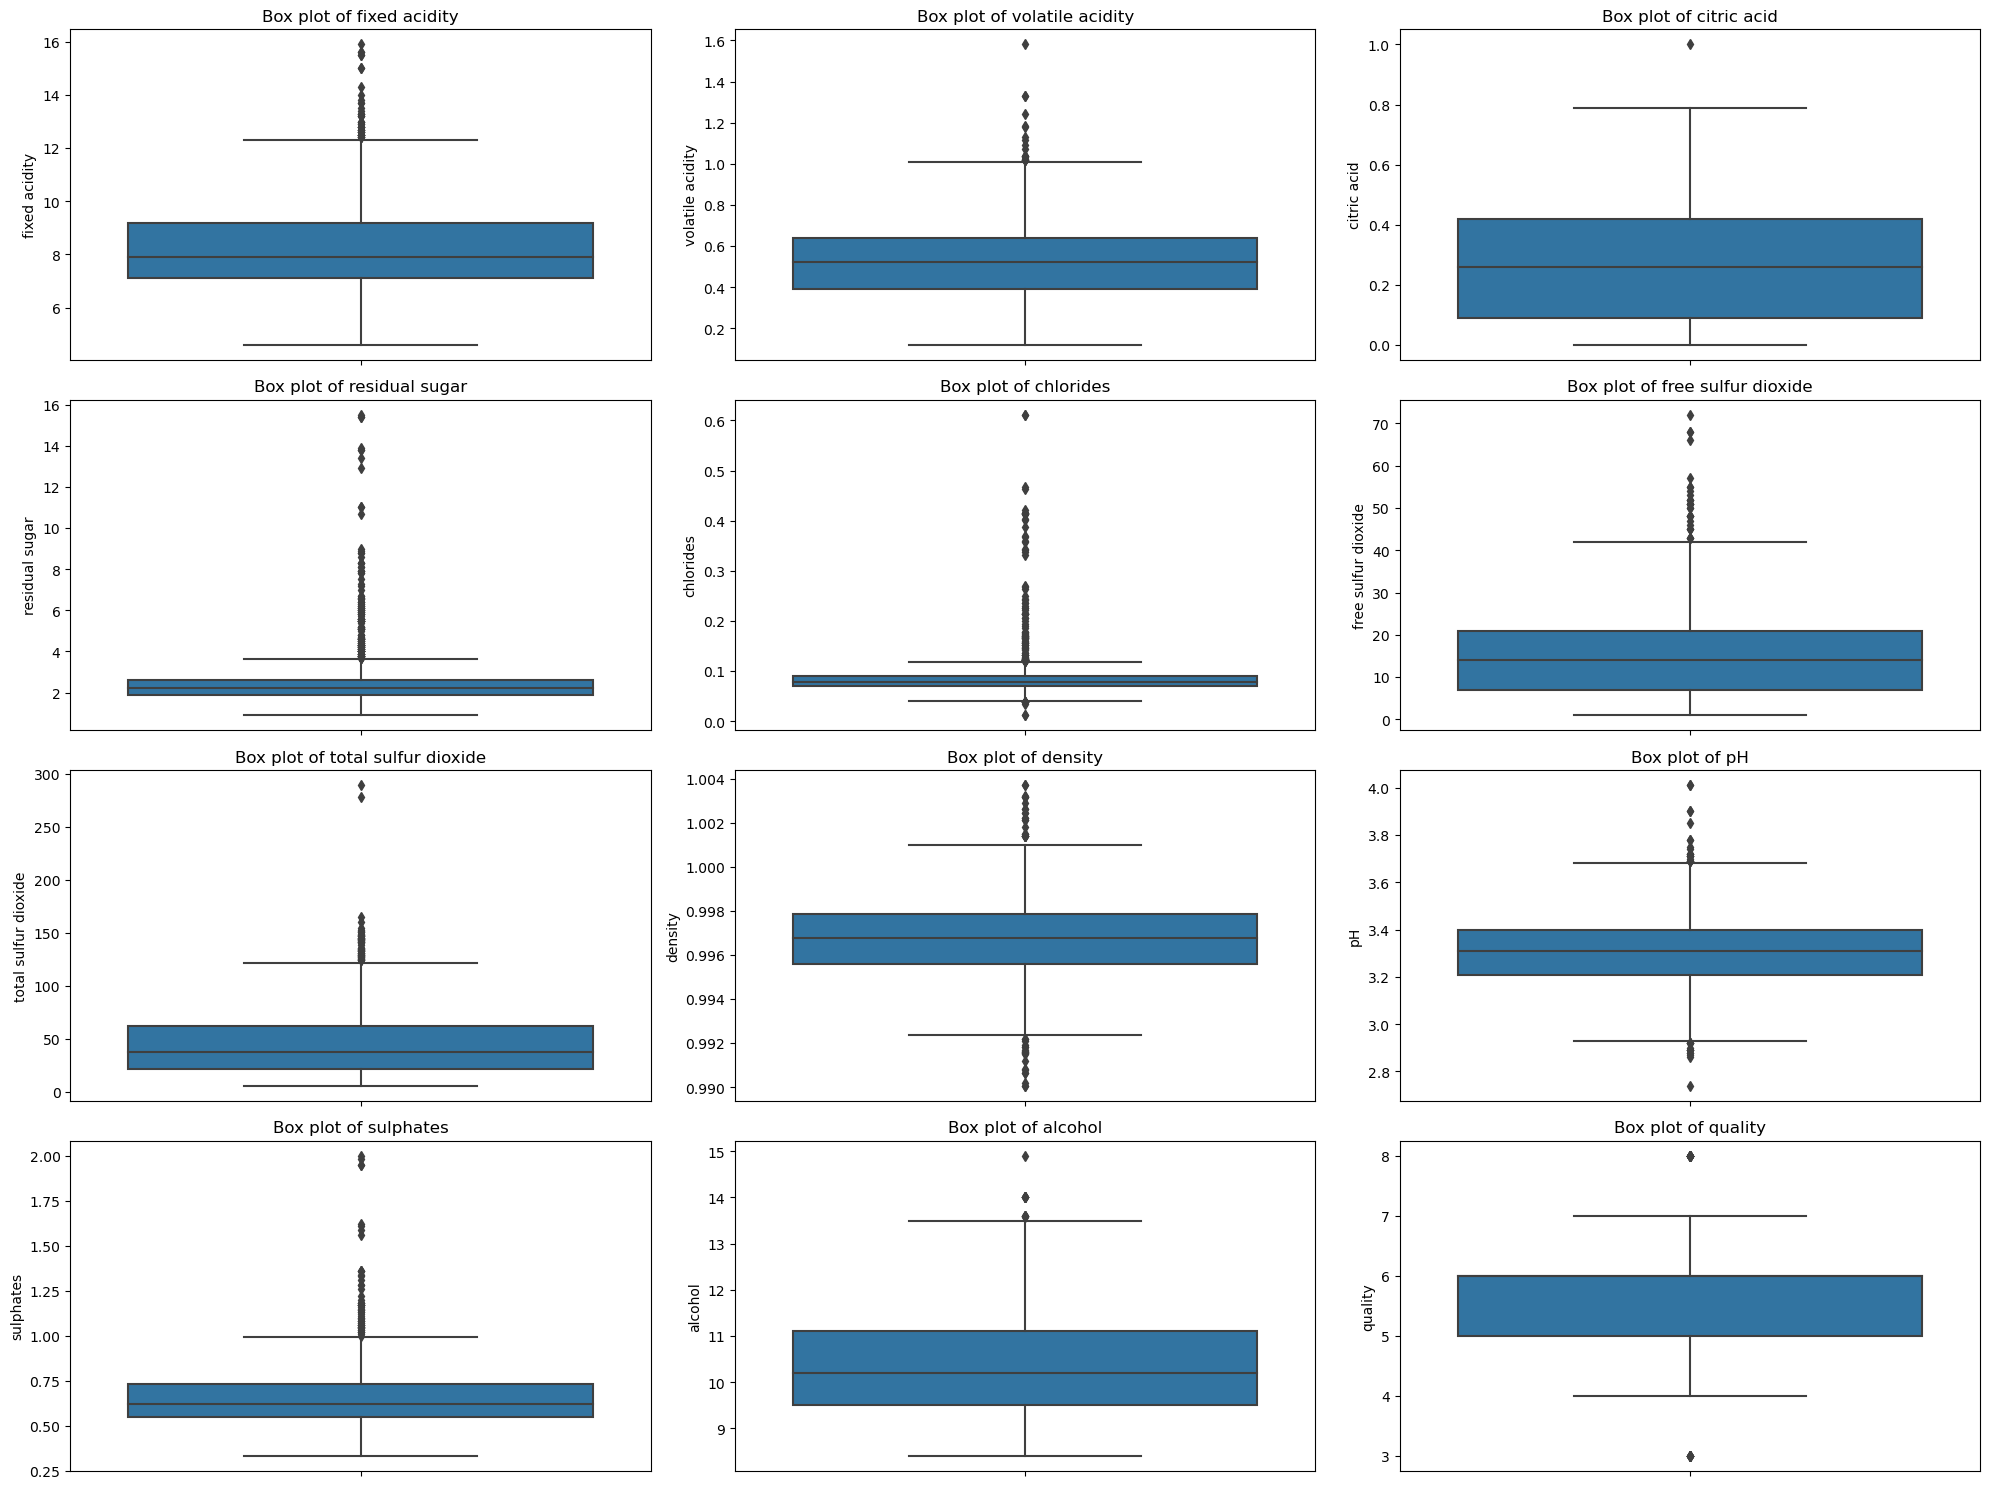

In [90]:
plt.figure(figsize=(20, 15))
for i, column in enumerate(wine_data.columns, 1):
    plt.subplot(4, 3, i)
    sns.boxplot(y=wine_data[column])
    plt.title(f'Box plot of {column}')
plt.tight_layout()
plt.show()


In [91]:
# Function to cap outliers
def cap_outliers(series):
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return series.clip(lower_bound, upper_bound)

# Apply capping to all features except the target variable
for column in wine_data.columns[:-1]:  # Exclude 'quality'
    wine_data[column] = cap_outliers(wine_data[column])

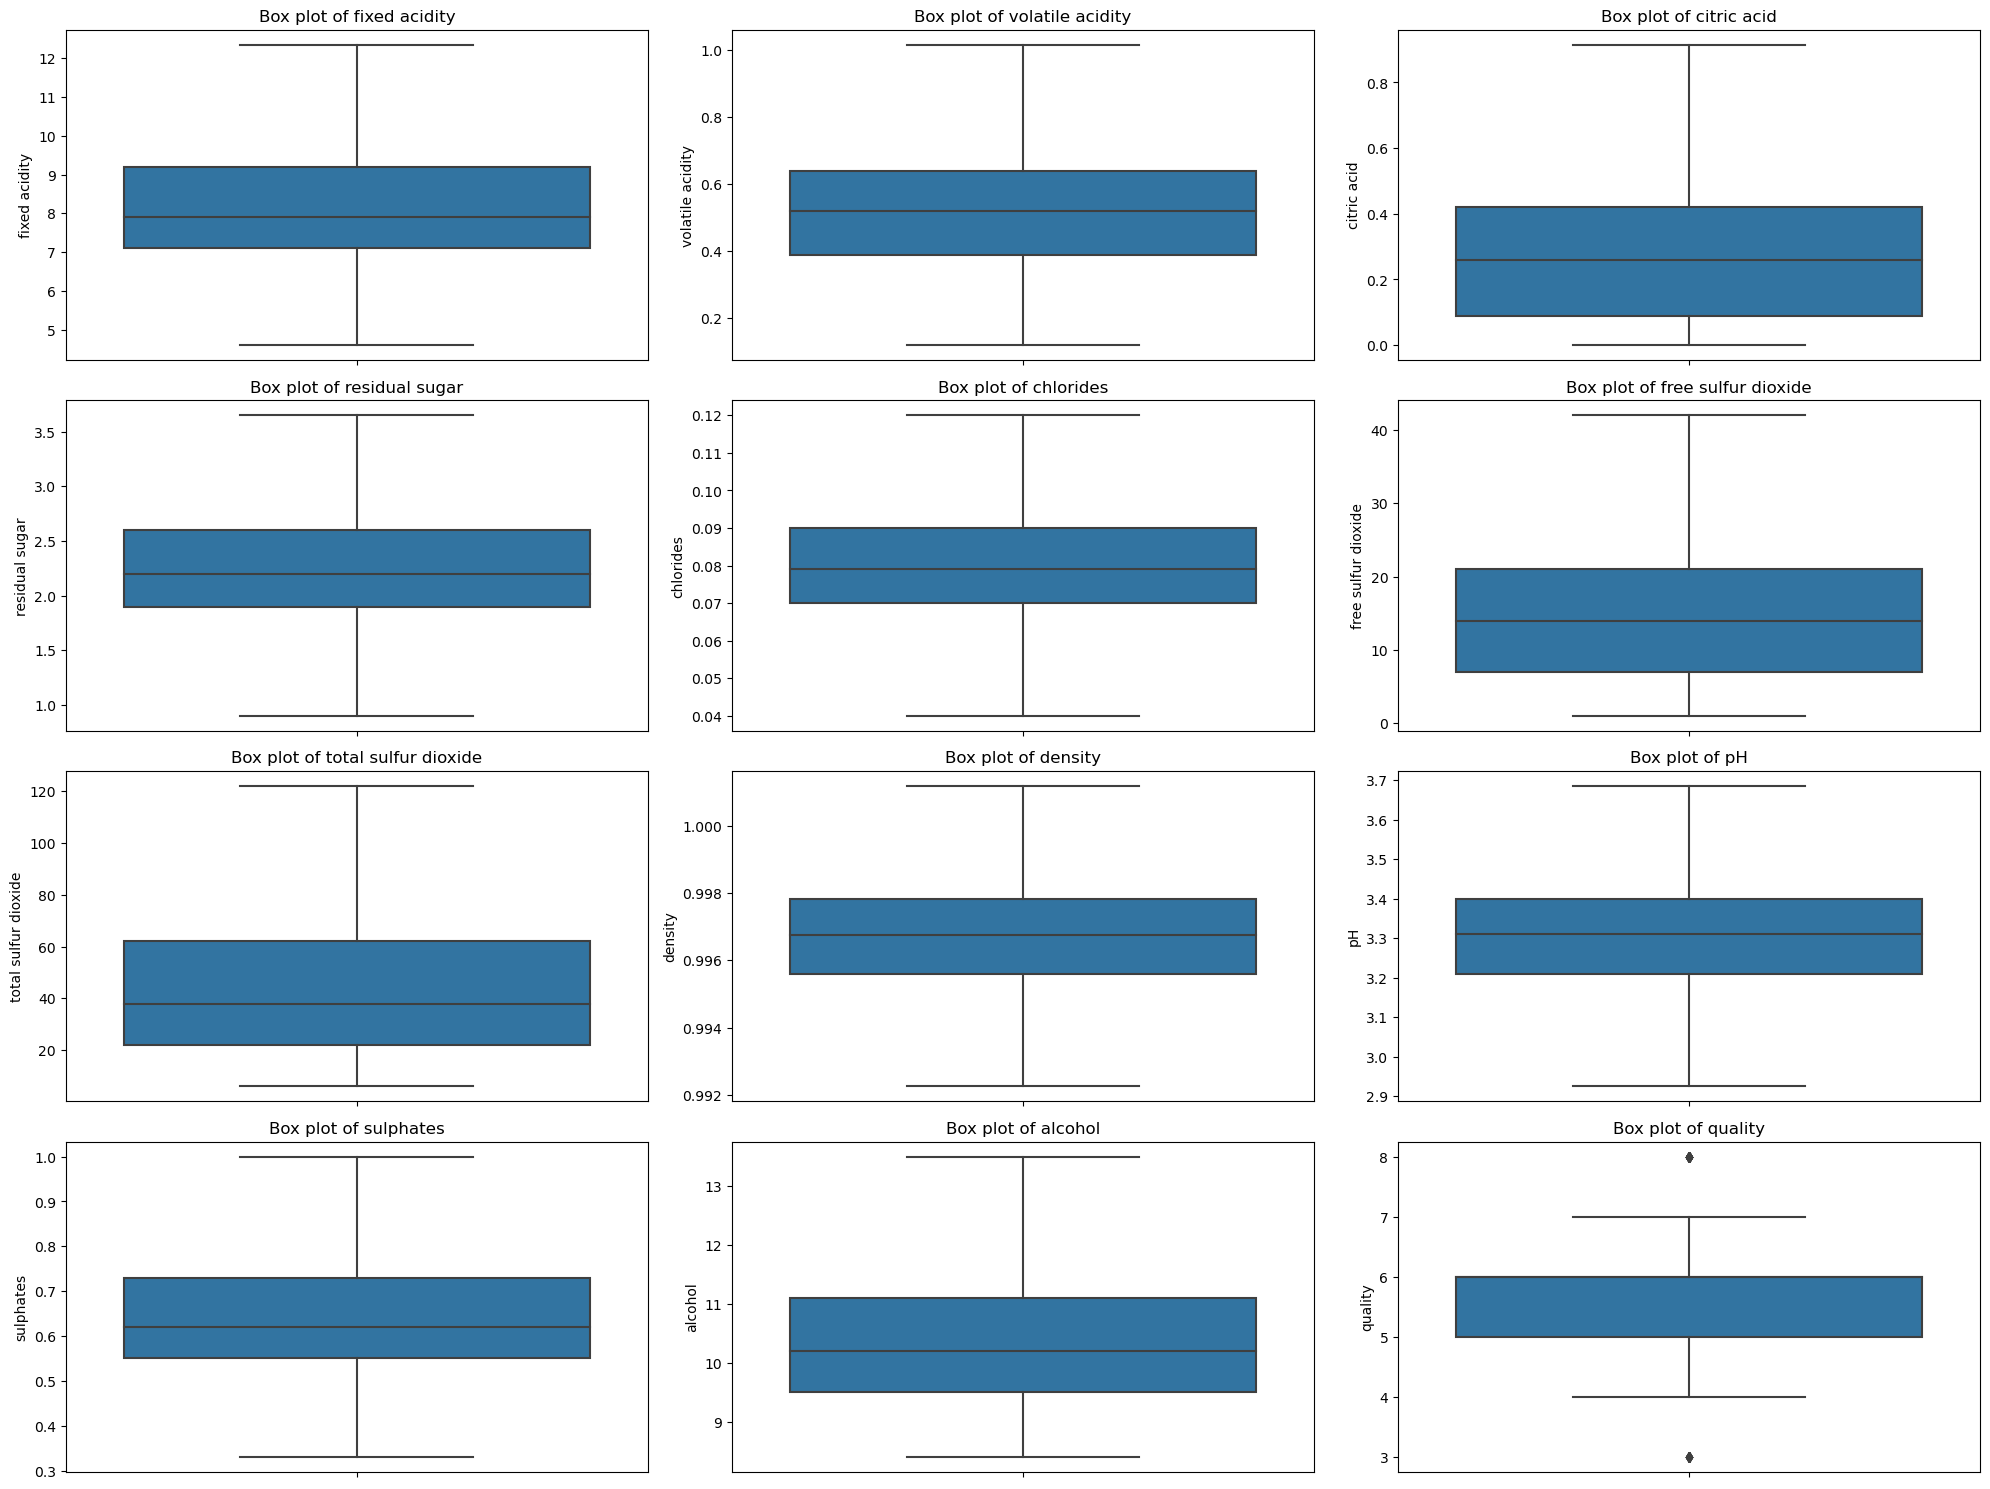

In [92]:
# Check if outliers are capped
plt.figure(figsize=(20, 15))
for i, column in enumerate(wine_data.columns, 1):
    plt.subplot(4, 3, i)
    sns.boxplot(y=wine_data[column])
    plt.title(f'Box plot of {column}')
plt.tight_layout()
plt.show()

### Correlation Heatmap

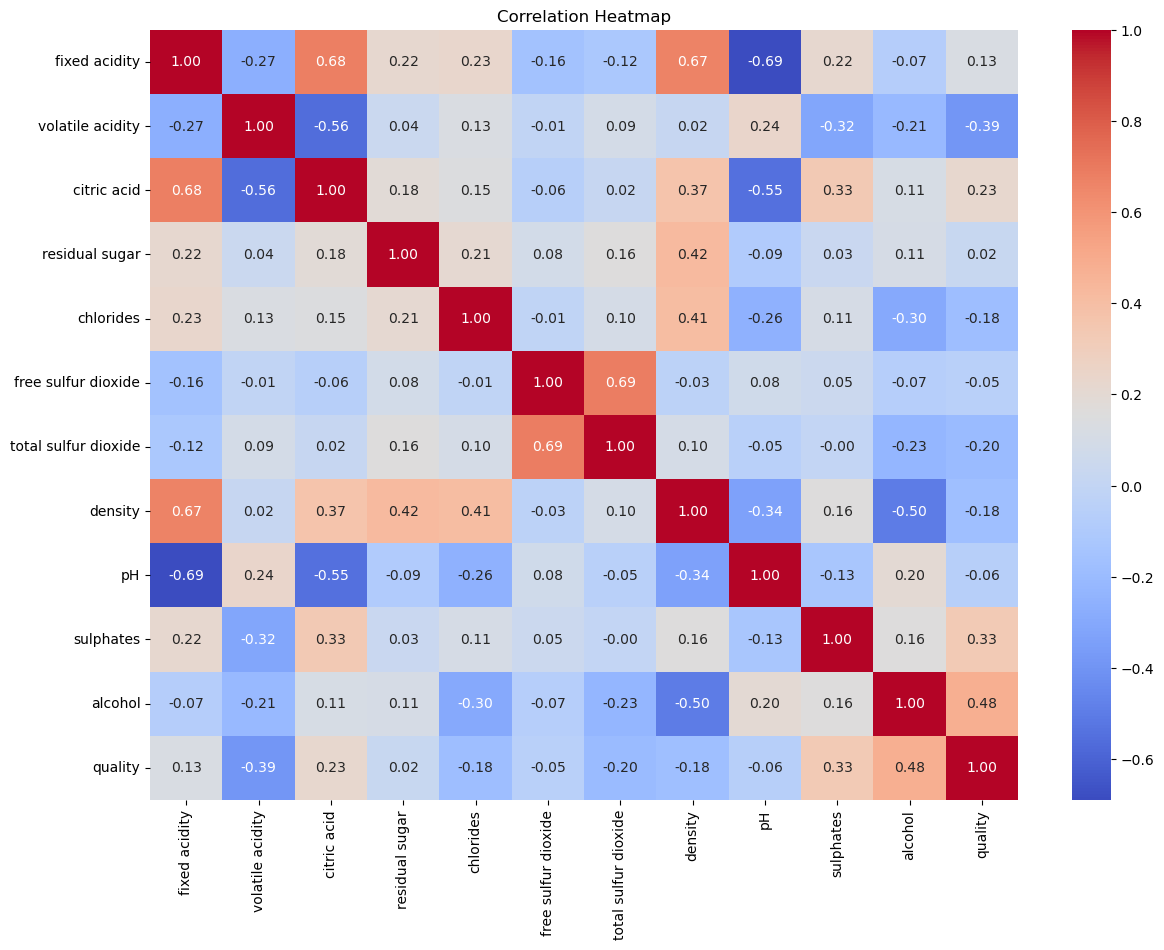

In [93]:
plt.figure(figsize=(14, 10))
correlation_matrix = wine_data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()


### Binarization of target variable

In [94]:
wine_data['quality'] = wine_data['quality'].apply(lambda x: 1 if x >= 7 else 0)

In [95]:
wine_data['quality'].value_counts()

quality
0    1382
1     217
Name: count, dtype: int64

<Axes: xlabel='quality', ylabel='count'>

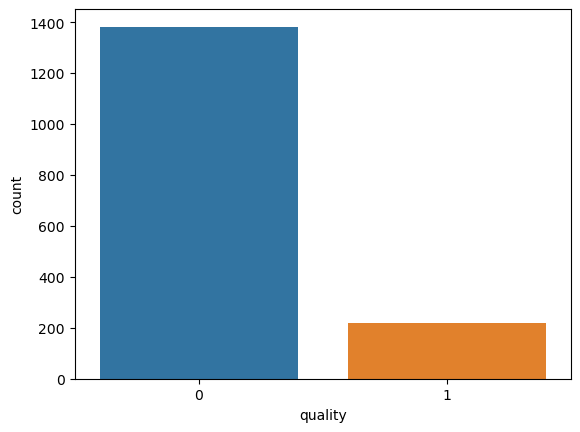

In [96]:
sns.countplot(x = "quality", data = wine_data)

### Split the data into features and target

In [97]:
X = wine_data.drop('quality', axis = 1)
y = wine_data['quality']

### Feature Scaling

In [98]:
# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Convert back to a DataFrame
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)

### Handling imbalance using SMOTE

In [99]:
# Apply SMOTE to balance the dataset
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_scaled, y)

# Check the distribution of the resampled target variable
y_resampled.value_counts()

quality
0    1382
1    1382
Name: count, dtype: int64

### Split the dataset into training and testing sets

In [100]:

X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42, stratify=y_resampled)


In [101]:
print("X_train shape: ", X_train.shape)
print("X_test shape: ", X_test.shape)
print("y_train shape: ", y_train.shape)
print("y_test shape: ", y_test.shape)

X_train shape:  (2211, 11)
X_test shape:  (553, 11)
y_train shape:  (2211,)
y_test shape:  (553,)


## Model Selection

### Logistic Regression

In [137]:
lr = LogisticRegression(random_state=42)
lr.fit(X_train, y_train)
lr_prediction = lr.predict(X_test)

# Accuracy of the model

# Training accuracy
lr_train_accuracy = lr.score(X_train, y_train)

# Test accuracy
lr_test_accuracy = accuracy_score(lr_prediction, y_test)

print("Logistic Regression Training Accuracy: {:.2f}%".format(lr_train_accuracy*100))
print("Logistic Regression Test Accuracy: {:.2f}%".format(lr_test_accuracy*100))

lr_precision = precision_score(y_test, lr_prediction)
lr_recall = recall_score(y_test, lr_prediction)
lr_f1 = f1_score(y_test, lr_prediction)

Logistic Regression Training Accuracy: 81.32%
Logistic Regression Test Accuracy: 82.64%


In [103]:
# Logistic Regression Classification report
print(classification_report(y_test, lr_prediction))

              precision    recall  f1-score   support

           0       0.83      0.82      0.83       277
           1       0.82      0.83      0.83       276

    accuracy                           0.83       553
   macro avg       0.83      0.83      0.83       553
weighted avg       0.83      0.83      0.83       553



TN:  227
TP:  230
FP:  50
FN:  46


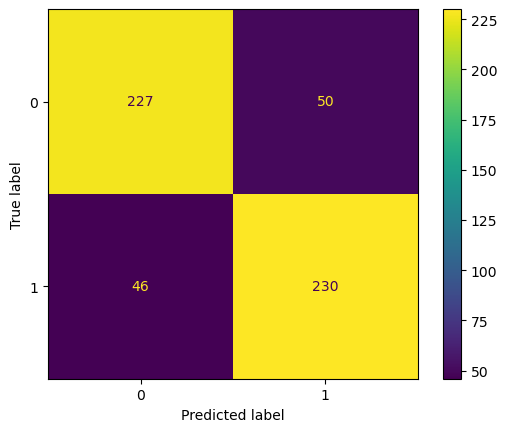

In [104]:
# Confusion matrix
cm = confusion_matrix(y_test, lr_prediction, labels = lr.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = lr.classes_)
disp.plot()
print("TN: ", cm[0, 0])
print("TP: ", cm[1, 1])
print("FP: ", cm[0, 1])
print("FN: ", cm[1, 0])

### Decision Tree Classifier

In [138]:
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)
dt_prediction = dt.predict(X_test)

# Accuracy of the model

# Training accuracy
dt_train_accuracy = dt.score(X_train, y_train)

# Test accuracy
dt_test_accuracy = accuracy_score(dt_prediction, y_test)

print("Decision Tree Training Accuracy: {:.2f}%".format(dt_train_accuracy*100))
print("Decision Tree Test Accuracy: {:.2f}%".format(dt_test_accuracy*100))

dt_precision = precision_score(y_test, dt_prediction)
dt_recall = recall_score(y_test, dt_prediction)
dt_f1 = f1_score(y_test, dt_prediction)

Decision Tree Training Accuracy: 100.00%
Decision Tree Test Accuracy: 90.24%


In [106]:
# Decision Tree Classification report
print(classification_report(y_test, dt_prediction))

              precision    recall  f1-score   support

           0       0.90      0.91      0.90       277
           1       0.91      0.89      0.90       276

    accuracy                           0.90       553
   macro avg       0.90      0.90      0.90       553
weighted avg       0.90      0.90      0.90       553



TN:  252
TP:  247
FP:  25
FN:  29


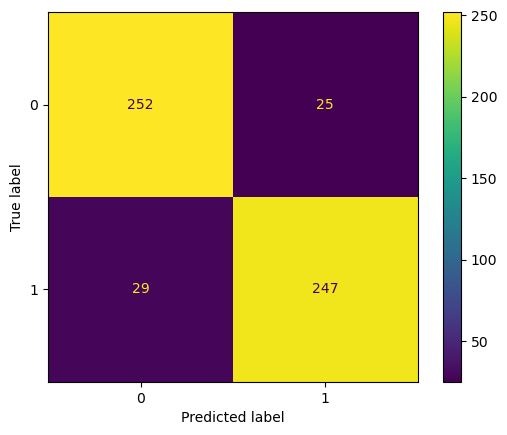

In [107]:
# Confusion matrix
cm = confusion_matrix(y_test, dt_prediction, labels = dt.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = dt.classes_)
disp.plot()
print("TN: ", cm[0, 0])
print("TP: ", cm[1, 1])
print("FP: ", cm[0, 1])
print("FN: ", cm[1, 0])

### Random Forest Classifier

In [139]:
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
rf_prediction = rf.predict(X_test)

# Accuracy of the model

# Training accuracy
rf_train_accuracy = rf.score(X_train, y_train)

# Test accuracy
rf_test_accuracy = accuracy_score(rf_prediction, y_test)

print("Random Forest Training Accuracy: {:.2f}%".format(rf_train_accuracy*100))
print("Random Forest Test Accuracy: {:.2f}%".format(rf_test_accuracy*100))

rf_precision = precision_score(y_test, rf_prediction)
rf_recall = recall_score(y_test, rf_prediction)
rf_f1 = f1_score(y_test, rf_prediction)

Random Forest Training Accuracy: 100.00%
Random Forest Test Accuracy: 96.20%


In [109]:
# Random Forest Classification report
print(classification_report(y_test, rf_prediction))

              precision    recall  f1-score   support

           0       0.98      0.94      0.96       277
           1       0.94      0.98      0.96       276

    accuracy                           0.96       553
   macro avg       0.96      0.96      0.96       553
weighted avg       0.96      0.96      0.96       553



TN:  261
TP:  271
FP:  16
FN:  5


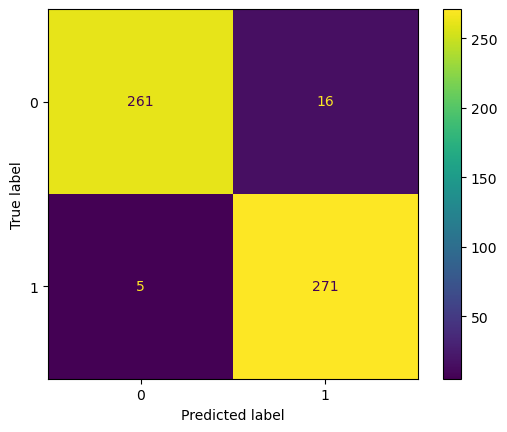

In [110]:
# Confusion matrix
cm = confusion_matrix(y_test, rf_prediction, labels = rf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = rf.classes_)
disp.plot()
print("TN: ", cm[0, 0])
print("TP: ", cm[1, 1])
print("FP: ", cm[0, 1])
print("FN: ", cm[1, 0])

### Support Vector Classifier (SVC)

In [140]:
svm = SVC(random_state=42)
svm.fit(X_train, y_train)
svm_prediction = svm.predict(X_test)

# Accuracy of the model

# Training accuracy
svm_train_accuracy = svm.score(X_train, y_train)

# Test accuracy
svm_test_accuracy = accuracy_score(svm_prediction, y_test)

print("Support Vector Classifier Training Accuracy: {:.2f}%".format(svm_train_accuracy*100))
print("Support Vector Classifier Test Accuracy: {:.2f}%".format(svm_test_accuracy*100))

svm_precision = precision_score(y_test, svm_prediction)
svm_recall = recall_score(y_test, svm_prediction)
svm_f1 = f1_score(y_test, svm_prediction)

Support Vector Classifier Training Accuracy: 89.91%
Support Vector Classifier Test Accuracy: 91.14%


In [112]:
# SVM Classification report
print(classification_report(y_test, svm_prediction))

              precision    recall  f1-score   support

           0       0.92      0.90      0.91       277
           1       0.90      0.92      0.91       276

    accuracy                           0.91       553
   macro avg       0.91      0.91      0.91       553
weighted avg       0.91      0.91      0.91       553



TN:  249
TP:  255
FP:  28
FN:  21


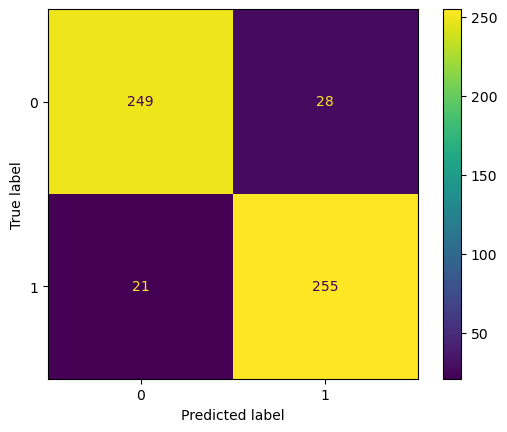

In [113]:
# Confusion matrix
cm = confusion_matrix(y_test, svm_prediction, labels = svm.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = svm.classes_)
disp.plot()
print("TN: ", cm[0, 0])
print("TP: ", cm[1, 1])
print("FP: ", cm[0, 1])
print("FN: ", cm[1, 0])

### KNN Classifier

In [141]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
knn_prediction = knn.predict(X_test)

# Accuracy of the model

# Training accuracy
knn_train_accuracy = knn.score(X_train, y_train)

# Test accuracy
knn_test_accuracy = accuracy_score(knn_prediction, y_test)

print("KNN Training Accuracy: {:.2f}%".format(knn_train_accuracy*100))
print("KNN Test Accuracy: {:.2f}%".format(knn_test_accuracy*100))

knn_precision = precision_score(y_test, knn_prediction)
knn_recall = recall_score(y_test, knn_prediction)
knn_f1 = f1_score(y_test, knn_prediction)

KNN Training Accuracy: 92.04%
KNN Test Accuracy: 89.69%


In [115]:
# KNN Classification report
print(classification_report(y_test, knn_prediction))

              precision    recall  f1-score   support

           0       0.99      0.81      0.89       277
           1       0.83      0.99      0.91       276

    accuracy                           0.90       553
   macro avg       0.91      0.90      0.90       553
weighted avg       0.91      0.90      0.90       553



TN:  223
TP:  273
FP:  54
FN:  3


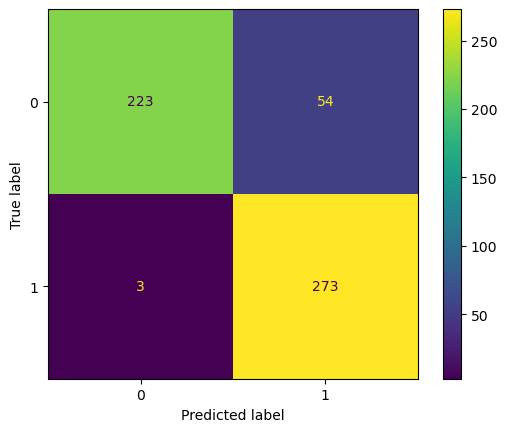

In [116]:
# Confusion matrix
cm = confusion_matrix(y_test, knn_prediction, labels = knn.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = knn.classes_)
disp.plot()
print("TN: ", cm[0, 0])
print("TP: ", cm[1, 1])
print("FP: ", cm[0, 1])
print("FN: ", cm[1, 0])

### Gradient Boost Classifier

In [142]:
gbc = GradientBoostingClassifier(random_state=42)
gbc.fit(X_train, y_train)
gbc_prediction = gbc.predict(X_test)

# Accuracy of the model

# Training accuracy
gbc_train_accuracy = gbc.score(X_train, y_train)

# Test accuracy
gbc_test_accuracy = accuracy_score(gbc_prediction, y_test)

print("Gradient Boost Classifier Training Accuracy: {:.2f}%".format(gbc_train_accuracy*100))
print("Gradient Boost Classifier Test Accuracy: {:.2f}%".format(gbc_test_accuracy*100))

gbc_precision = precision_score(y_test, gbc_prediction)
gbc_recall = recall_score(y_test, gbc_prediction)
gbc_f1 = f1_score(y_test, gbc_prediction)

Gradient Boost Classifier Training Accuracy: 94.39%
Gradient Boost Classifier Test Accuracy: 92.95%


In [118]:
# Gradient Boosting Classification report
print(classification_report(y_test, gbc_prediction))

              precision    recall  f1-score   support

           0       0.95      0.90      0.93       277
           1       0.91      0.96      0.93       276

    accuracy                           0.93       553
   macro avg       0.93      0.93      0.93       553
weighted avg       0.93      0.93      0.93       553



TN:  250
TP:  264
FP:  27
FN:  12


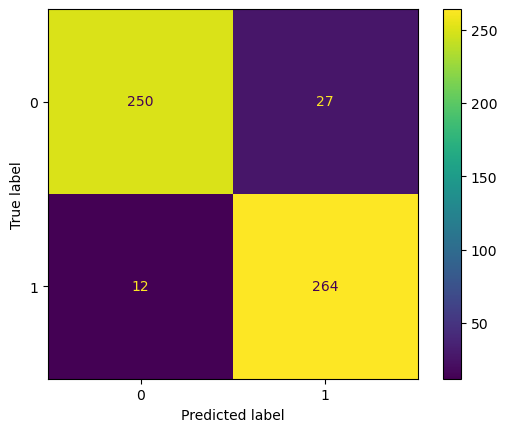

In [119]:
# Confusion matrix
cm = confusion_matrix(y_test, gbc_prediction, labels = gbc.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = gbc.classes_)
disp.plot()
print("TN: ", cm[0, 0])
print("TP: ", cm[1, 1])
print("FP: ", cm[0, 1])
print("FN: ", cm[1, 0])

### XGBoost

In [153]:
xgb = XGBClassifier(random_state=42)
xgb.fit(X_train, y_train)
xgb_prediction = xgb.predict(X_test)

# Accuracy of the model

# Training accuracy
xgb_train_accuracy = xgb.score(X_train, y_train)

# Test accuracy
xgb_test_accuracy = accuracy_score(xgb_prediction, y_test)

print("XGBoost Training Accuracy: {:.2f}%".format(xgb_train_accuracy*100))
print("XGBoost Test Accuracy: {:.2f}%".format(xgb_test_accuracy*100))

xgb_precision = precision_score(y_test, xgb_prediction)
xgb_recall = recall_score(y_test, xgb_prediction)
xgb_f1 = f1_score(y_test, xgb_prediction)

XGBoost Training Accuracy: 100.00%
XGBoost Test Accuracy: 95.66%


In [121]:
# XGBoost Classification report
print(classification_report(y_test, xgb_prediction))

              precision    recall  f1-score   support

           0       0.97      0.94      0.96       277
           1       0.94      0.97      0.96       276

    accuracy                           0.96       553
   macro avg       0.96      0.96      0.96       553
weighted avg       0.96      0.96      0.96       553



TN:  261
TP:  268
FP:  16
FN:  8


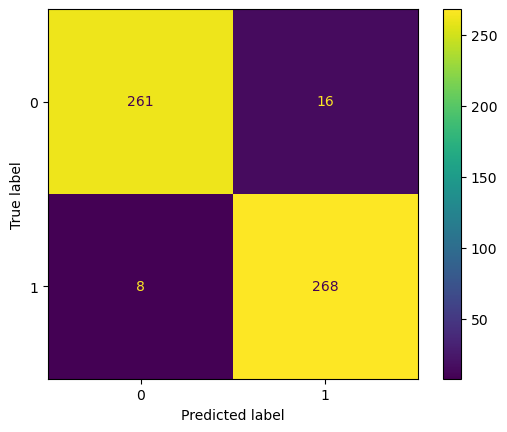

In [122]:
# Confusion matrix
cm = confusion_matrix(y_test, xgb_prediction, labels = xgb.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = xgb.classes_)
disp.plot()
print("TN: ", cm[0, 0])
print("TP: ", cm[1, 1])
print("FP: ", cm[0, 1])
print("FN: ", cm[1, 0])

In [144]:
models = pd.DataFrame({"Model: ": ["Logistic Regression", "Decision Tree", "Random Forest", "SVM", "KNN", "Gradient Boosting", "XGBoost"],
                       "Test Accuracy": [lr_test_accuracy, dt_test_accuracy, rf_test_accuracy, svm_test_accuracy, knn_test_accuracy, gbc_test_accuracy, xgb_test_accuracy]})

In [155]:
model_performance = pd.DataFrame({
    "Model": ["Logistic Regression", "Decision Tree", "Random Forest", "SVM", "KNN", "Gradient Boosting", "XGBoost"],
    "Train Accuracy": [lr_train_accuracy, dt_train_accuracy, rf_train_accuracy, svm_train_accuracy, knn_train_accuracy, gbc_train_accuracy, xgb_train_accuracy],
    "Test Accuracy": [lr_test_accuracy, dt_test_accuracy, rf_test_accuracy, svm_test_accuracy, knn_test_accuracy, gbc_test_accuracy, xgb_test_accuracy],
    "Precision": [lr_precision, dt_precision, rf_precision, svm_precision, knn_precision, gbc_precision, xgb_precision],
    "Recall": [lr_recall, dt_recall, rf_recall, svm_recall, knn_recall, gbc_recall, xgb_recall],
    "F1 Score": [lr_f1, dt_f1, rf_f1, svm_f1, knn_f1, gbc_f1, xgb_f1]
})

model_performance

,Model,Train Accuracy,Test Accuracy,Precision,Recall,F1 Score
0,Logistic Regression,0.813207,0.826401,0.821429,0.833333,0.827338
1,Decision Tree,1.000000,0.902351,0.908088,0.894928,0.901460
2,Random Forest,1.000000,0.962025,0.944251,0.981884,0.962700
3,SVM,0.899141,0.911392,0.901060,0.923913,0.912343
4,KNN,0.920398,0.896926,0.834862,0.989130,0.905473
5,Gradient Boosting,0.943917,0.929476,0.907216,0.956522,0.931217
6,XGBoost,1.000000,0.956600,0.943662,0.971014,0.957143


In [154]:
model_performance_sorted = model_performance.sort_values(by="Test Accuracy", ascending=False)
model_performance_sorted

,Model,Train Accuracy,Test Accuracy,Precision,Recall,F1 Score
2,Random Forest,1.000000,0.962025,0.944251,0.981884,0.962700
6,XGBoost,1.000000,0.956600,0.943662,0.971014,0.957143
5,Gradient Boosting,0.943917,0.929476,0.907216,0.956522,0.931217
3,SVM,0.899141,0.911392,0.901060,0.923913,0.912343
1,Decision Tree,1.000000,0.902351,0.908088,0.894928,0.901460
4,KNN,0.920398,0.896926,0.834862,0.989130,0.905473
0,Logistic Regression,0.813207,0.826401,0.821429,0.833333,0.827338


In [156]:
print(model_performance_sorted)

                 Model  Train Accuracy  Test Accuracy  Precision    Recall  \
2        Random Forest        1.000000       0.962025   0.944251  0.981884   
6              XGBoost        1.000000       0.956600   0.943662  0.971014   
5    Gradient Boosting        0.943917       0.929476   0.907216  0.956522   
3                  SVM        0.899141       0.911392   0.901060  0.923913   
1        Decision Tree        1.000000       0.902351   0.908088  0.894928   
4                  KNN        0.920398       0.896926   0.834862  0.989130   
0  Logistic Regression        0.813207       0.826401   0.821429  0.833333   

   F1 Score  
2  0.962700  
6  0.957143  
5  0.931217  
3  0.912343  
1  0.901460  
4  0.905473  
0  0.827338  


In [150]:
models_sorted = models.sort_values(by="Test Accuracy", ascending=False)

<Axes: xlabel='Test Accuracy', ylabel='Model: '>

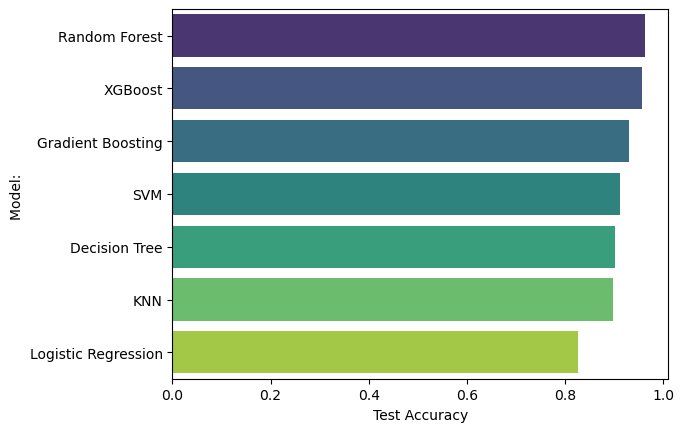

In [151]:
sns.barplot(x=models_sorted["Test Accuracy"], y=models_sorted["Model: "], palette="viridis")

### Prediction on New Data

In [71]:
new_data = pd.DataFrame({'fixed acidity':7.3,
'volatile acidity':0.65,
'citric acid' :0.00,
'residual sugar':1.2,
'chlorides' :0.065,
'free sulfur dioxide':15.0,
'total sulfur dioxide' :21.0,
'density' :0.9946,
'pH': 3.39,
'sulphates' :0.47,
'alcohol' :10.0,}, index=[0])

In [72]:
new_data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.3,0.65,0.0,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0


In [73]:
predict = rf.predict(new_data)
if predict == 1:
    print('Good Quality Wine')
else:
    print('Bad Quality Wine')

Bad Quality Wine
